In [103]:
import numpy as np
import MDAnalysis as md
import pandas as pd
from io import StringIO

In [ ]:
%pip install pandas

In [2]:
POS = md.Universe('WaterBox.pdb')

C:\Users\ssk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\topology\PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


In [97]:


# PDB fixed-width column specs
colspecs = [(0,6), (6,11), (12,16), (17,20), (21,22), (22,26), (30,38), (38,46), (46,54)]
column_names = ['record', 'atom_number', 'atom_name', 'residue_name', 'chain_id', 'residue_number', 'x', 'y', 'z']

# Only keep ATOM/HETATM lines (ignore remarks, headers)
with open("WaterBox.pdb") as file:
    lines = [line for line in file if line.startswith(("ATOM", "HETATM"))]

# Write to temporary CSV-like structure in memory
from io import StringIO
data_string = StringIO("".join(lines))

# Read using fixed width
data = pd.read_fwf(data_string, colspecs=colspecs, names=column_names)

# Now you can filter like this:
oxygen = data[data['atom_name'].str.strip() == 'OH2']


In [99]:
print(oxygen.head())
print(oxygen[['atom_name', 'x', 'y', 'z']])

   record  atom_number atom_name residue_name  chain_id  residue_number  \
0    ATOM            1       OH2          SPC       NaN               1   
3    ATOM            4       OH2          SPC       NaN               2   
6    ATOM            7       OH2          SPC       NaN               3   
9    ATOM           10       OH2          SPC       NaN               4   
12   ATOM           13       OH2          SPC       NaN               5   

         x       y       z  
0    7.202  -0.549  10.503  
3  -11.530 -10.058 -12.176  
6   11.978  -0.964   2.591  
9    8.655   9.863 -10.434  
12  10.640  11.630   4.200  
     atom_name       x       y       z
0          OH2   7.202  -0.549  10.503
3          OH2 -11.530 -10.058 -12.176
6          OH2  11.978  -0.964   2.591
9          OH2   8.655   9.863 -10.434
12         OH2  10.640  11.630   4.200
...        ...     ...     ...     ...
1521       OH2 -11.062  -7.419   6.898
1524       OH2 -14.467  10.823  -1.110
1527       OH2  -4.104  

In [101]:
data = pd.read_csv("WaterBox.pdb")

In [104]:

# Step 1: Read only ATOM and HETATM lines from the PDB file
with open("WaterBox.pdb") as file:
    lines = [line for line in file if line.startswith(("ATOM", "HETATM"))]

# Step 2: Define the fixed-width column structure of a PDB file
colspecs = [
    (0, 6),    # record
    (6, 11),   # atom number
    (12, 16),  # atom name
    (17, 20),  # residue name
    (21, 22),  # chain ID
    (22, 26),  # residue number
    (30, 38),  # x
    (38, 46),  # y
    (46, 54),  # z
]
column_names = [
    'record', 'atom_number', 'atom_name', 'residue_name',
    'chain_id', 'residue_number', 'x', 'y', 'z'
]

# Step 3: Read it using pandas fixed-width reader
data = pd.read_fwf(StringIO("".join(lines)), colspecs=colspecs, names=column_names)

# Step 4: Filter for oxygen atoms labeled 'OH2'
oxygen = data[data['atom_name'].str.strip() == 'OH2']


In [106]:
POS.atoms.positions

array([[ 7.202, -0.549, 10.503],
       [ 7.541, -0.426, 11.436],
       [ 7.565,  0.178,  9.92 ],
       ...,
       [ 8.134, -5.881, -4.124],
       [ 8.484, -6.663, -4.638],
       [ 8.187, -6.076, -3.144]], shape=(1536, 3), dtype=float32)

In [4]:

('record','U6'),
('atom_id','i4'),
('atom_name','U4'),
('res_name','U4'),
('res_id','i4'),
('x','f8'),
('y','f8'),
('z','f8'),
('occupancy','f8'),
('temp_factor','f8'),
('segment','U6')



('segment', 'U6')

In [5]:
dtype=[
    ('record','U6'),
    ('atom_id','i4'),
    ('atom_name','U4'),
    ('res_name','U4'),
    ('res_id','i4'),
    ('x','f8'),
    ('y','f8'),
    ('z','f8'),
    ('occupancy','f8'),
    ('temp_factor','f8'),
    ('segment','U6')
]

In [6]:
data = np.genfromtxt(
    open('WaterBox.pdb','r'),
    dtype=dtype,
    autostrip=True
)

In [7]:
print (data)

[('ATOM',    1, 'OH2', 'SPCE',   1, 7.202, -0.549, 10.503, 0., 0., 'SOLV')
 ('ATOM',    2, 'H1', 'SPCE',   1, 7.541, -0.426, 11.436, 0., 0., 'SOLV')
 ('ATOM',    3, 'H2', 'SPCE',   1, 7.565,  0.178,  9.92 , 0., 0., 'SOLV')
 ...
 ('ATOM', 1534, 'OH2', 'SPCE', 512, 8.134, -5.881, -4.124, 0., 0., 'SOLV')
 ('ATOM', 1535, 'H1', 'SPCE', 512, 8.484, -6.663, -4.638, 0., 0., 'SOLV')
 ('ATOM', 1536, 'H2', 'SPCE', 512, 8.187, -6.076, -3.144, 0., 0., 'SOLV')]


In [8]:
data['x']

array([7.202, 7.541, 7.565, ..., 8.134, 8.484, 8.187], shape=(1536,))

In [9]:
data['x'], data['y'], data['z']

(array([7.202, 7.541, 7.565, ..., 8.134, 8.484, 8.187], shape=(1536,)),
 array([-0.549, -0.426,  0.178, ..., -5.881, -6.663, -6.076], shape=(1536,)),
 array([10.503, 11.436,  9.92 , ..., -4.124, -4.638, -3.144], shape=(1536,)))

In [10]:
data['x'], data['y'], data['z']

(array([7.202, 7.541, 7.565, ..., 8.134, 8.484, 8.187], shape=(1536,)),
 array([-0.549, -0.426,  0.178, ..., -5.881, -6.663, -6.076], shape=(1536,)),
 array([10.503, 11.436,  9.92 , ..., -4.124, -4.638, -3.144], shape=(1536,)))

In [81]:
type (data)

numpy.ndarray

In [90]:
print(data.dtype)
print(data[0])

float64
7.202


In [ ]:
oxygen = data[data['atom_name'] == 'OH2']

In [12]:
oxygen['x']

array([ 7.2020e+00, -1.1530e+01,  1.1978e+01,  8.6550e+00,  1.0640e+01,
       -2.7940e+00, -8.6050e+00, -4.7610e+00, -1.1259e+01,  2.3540e+00,
       -7.3040e+00, -1.1819e+01,  8.0430e+00,  3.5950e+00,  1.3460e+00,
        3.5810e+00, -1.1397e+01,  8.4860e+00,  1.2497e+01, -1.2587e+01,
       -6.1960e+00,  5.7140e+00,  2.3290e+00, -1.2146e+01, -3.4400e-01,
        5.8650e+00, -1.2181e+01,  1.8300e-01,  1.2920e+01, -1.6200e+00,
       -2.4830e+00, -1.8930e+00, -8.7770e+00, -6.1850e+00,  5.4000e+00,
        3.2490e+00, -8.9190e+00,  1.1321e+01, -1.0850e+01,  1.0719e+01,
        6.2800e-01, -1.0915e+01,  5.0230e+00,  1.1478e+01,  9.9410e+00,
        7.8640e+00, -9.1200e+00,  7.8800e+00, -8.0680e+00, -6.9240e+00,
        1.0358e+01, -2.9780e+00, -9.3260e+00, -1.2430e+01, -5.4730e+00,
       -1.0634e+01, -5.7230e+00,  8.0230e+00, -1.2283e+01, -1.1819e+01,
       -8.6410e+00,  1.2241e+01, -3.0100e-01, -5.9190e+00, -8.5370e+00,
       -5.7800e+00,  4.0450e+00,  1.1250e+00,  6.7820e+00,  6.34

In [14]:
import numpy as np

In [17]:
import numpy as np
from scipy.spatial.distance import cdist

In [18]:
arr = np.array([7.2020e+00, -1.1530e+01,  1.1978e+01,  8.6550e+00,  1.0640e+01,
       -2.7940e+00, -8.6050e+00, -4.7610e+00, -1.1259e+01,  2.3540e+00,
       -7.3040e+00, -1.1819e+01,  8.0430e+00,  3.5950e+00,  1.3460e+00,
        3.5810e+00, -1.1397e+01,  8.4860e+00,  1.2497e+01, -1.2587e+01,
       -6.1960e+00,  5.7140e+00,  2.3290e+00, -1.2146e+01, -3.4400e-01,
        5.8650e+00, -1.2181e+01,  1.8300e-01,  1.2920e+01, -1.6200e+00,
       -2.4830e+00, -1.8930e+00, -8.7770e+00, -6.1850e+00,  5.4000e+00,
        3.2490e+00, -8.9190e+00,  1.1321e+01, -1.0850e+01,  1.0719e+01,
        6.2800e-01, -1.0915e+01,  5.0230e+00,  1.1478e+01,  9.9410e+00,
        7.8640e+00, -9.1200e+00,  7.8800e+00, -8.0680e+00, -6.9240e+00,
        1.0358e+01, -2.9780e+00, -9.3260e+00, -1.2430e+01, -5.4730e+00,
       -1.0634e+01, -5.7230e+00,  8.0230e+00, -1.2283e+01, -1.1819e+01,
       -8.6410e+00,  1.2241e+01, -3.0100e-01, -5.9190e+00, -8.5370e+00,
       -5.7800e+00,  4.0450e+00,  1.1250e+00,  6.7820e+00,  6.3440e+00,
       -8.5770e+00,  2.4700e+00, -1.2016e+01,  1.0262e+01,  4.7000e+00,
       -6.7590e+00, -8.7700e-01, -8.3300e-01, -7.5080e+00, -7.3170e+00,
       -1.0230e+00, -1.1377e+01,  9.6190e+00,  7.2570e+00, -5.3890e+00,
        8.6190e+00, -8.8960e+00, -3.8650e+00, -1.0985e+01, -4.4250e+00,
        7.9500e+00,  7.8400e-01,  1.4310e+00,  6.8710e+00, -1.0114e+01,
       -7.2690e+00, -1.1287e+01, -3.3790e+00,  9.2480e+00,  2.7920e+00,
       -7.9840e+00, -1.0211e+01, -1.2177e+01, -1.7380e+00,  2.7630e+00,
       -4.0470e+00, -1.1092e+01, -2.8380e+00, -4.5670e+00,  1.0251e+01,
       -8.5830e+00, -6.0600e-01,  2.7500e-01,  2.8230e+00, -2.0750e+00,
        5.1830e+00, -8.8800e+00, -4.2490e+00,  4.5430e+00,  1.7370e+00,
       -1.9830e+00,  3.2990e+00,  6.8000e+00, -9.6900e+00, -9.2730e+00,
        1.0207e+01,  8.3600e-01,  8.9130e+00, -5.4380e+00, -3.6810e+00,
       -1.0471e+01,  1.1583e+01,  1.1431e+01, -7.4100e-01, -1.9130e+00,
       -1.0400e-01,  5.9800e+00,  2.2100e+00, -9.5350e+00, -2.2230e+00,
       -1.0353e+01,  6.2570e+00, -1.1062e+01, -1.4467e+01, -4.1040e+00,
       -1.7940e+00,  8.1340e+00])

In [19]:
arr_2d = arr.reshape(-1, 1)

In [20]:
distance_x = cdist(arr_2d, arr_2d, metric='cityblock')  # Manhattan distance = |a - b|

In [21]:
distance_x

array([[ 0.   , 18.732,  4.776, ..., 11.306,  8.996,  0.932],
       [18.732,  0.   , 23.508, ...,  7.426,  9.736, 19.664],
       [ 4.776, 23.508,  0.   , ..., 16.082, 13.772,  3.844],
       ...,
       [11.306,  7.426, 16.082, ...,  0.   ,  2.31 , 12.238],
       [ 8.996,  9.736, 13.772, ...,  2.31 ,  0.   ,  9.928],
       [ 0.932, 19.664,  3.844, ..., 12.238,  9.928,  0.   ]],
      shape=(147, 147))

In [22]:
data['y']

array([-0.549, -0.426,  0.178, ..., -5.881, -6.663, -6.076], shape=(1536,))

In [23]:
data['z']

array([10.503, 11.436,  9.92 , ..., -4.124, -4.638, -3.144], shape=(1536,))

In [26]:
import matplotlib.pyplot as plt

In [27]:
data = oxygen['x']

In [28]:
data = data[:(len(data) // 2) * 2]
coords_2d = data.reshape(-1, 2)
print(data)

[ 7.2020e+00 -1.1530e+01  1.1978e+01  8.6550e+00  1.0640e+01 -2.7940e+00
 -8.6050e+00 -4.7610e+00 -1.1259e+01  2.3540e+00 -7.3040e+00 -1.1819e+01
  8.0430e+00  3.5950e+00  1.3460e+00  3.5810e+00 -1.1397e+01  8.4860e+00
  1.2497e+01 -1.2587e+01 -6.1960e+00  5.7140e+00  2.3290e+00 -1.2146e+01
 -3.4400e-01  5.8650e+00 -1.2181e+01  1.8300e-01  1.2920e+01 -1.6200e+00
 -2.4830e+00 -1.8930e+00 -8.7770e+00 -6.1850e+00  5.4000e+00  3.2490e+00
 -8.9190e+00  1.1321e+01 -1.0850e+01  1.0719e+01  6.2800e-01 -1.0915e+01
  5.0230e+00  1.1478e+01  9.9410e+00  7.8640e+00 -9.1200e+00  7.8800e+00
 -8.0680e+00 -6.9240e+00  1.0358e+01 -2.9780e+00 -9.3260e+00 -1.2430e+01
 -5.4730e+00 -1.0634e+01 -5.7230e+00  8.0230e+00 -1.2283e+01 -1.1819e+01
 -8.6410e+00  1.2241e+01 -3.0100e-01 -5.9190e+00 -8.5370e+00 -5.7800e+00
  4.0450e+00  1.1250e+00  6.7820e+00  6.3440e+00 -8.5770e+00  2.4700e+00
 -1.2016e+01  1.0262e+01  4.7000e+00 -6.7590e+00 -8.7700e-01 -8.3300e-01
 -7.5080e+00 -7.3170e+00 -1.0230e+00 -1.1377e+01  9

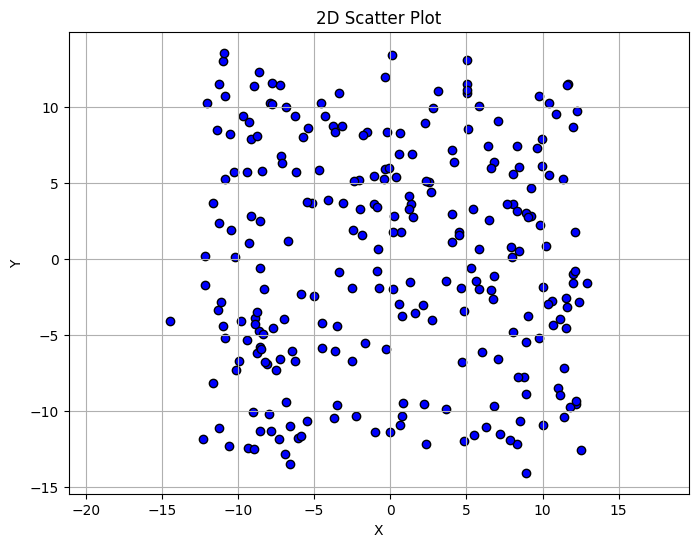

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(coords_2d[:, 0], coords_2d[:, 1], c='blue', edgecolor='k')
plt.title("2D Scatter Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [31]:
data = data[:(len(data) // 3) * 3]
coords_3d = data.reshape(-1, 3)

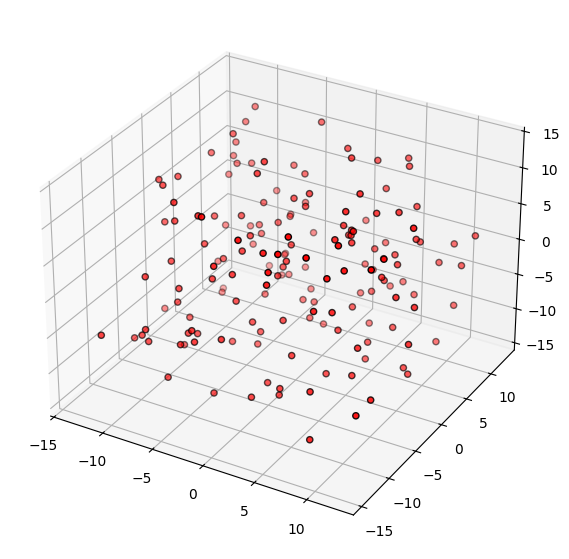

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords_3d[:, 0], coords_3d[:, 1], coords_3d[:, 2], c='red', edgecolor='k')

In [33]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [34]:
def plot_subdivided_cube(divs=4):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

In [36]:
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

(0.0, 1.0)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_subdivided_cube(divs=4):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define cube boundaries
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    # Define faces: (axis, fixed coordinate value)
    faces = [
        ('z', 0), ('z', 1),
        ('y', 0), ('y', 1),
        ('x', 0), ('x', 1)
    ]

    for axis, const in faces:
        for i in range(divs):
            for j in range(divs):
                u = i / divs
                v = j / divs
                du = 1 / divs
                dv = 1 / divs

                if axis == 'z':
                    x = [u, u + du, u + du, u]
                    y = [v, v, v + dv, v + dv]
                    z = [const] * 4
                elif axis == 'y':
                    x = [u, u + du, u + du, u]
                    z = [v, v, v + dv, v + dv]
                    y = [const] * 4
                elif axis == 'x':
                    y = [u, u + du, u + du, u]
                    z = [v, v, v + dv, v + dv]
                    x = [const] * 4

                verts = [list(zip(x, y, z))]
                ax.add_collection3d(Poly3DCollection(
                    verts, facecolors='skyblue', edgecolors='black', linewidths=0.3, alpha=0.7
                ))

    ax.set_box_aspect([1, 1, 1])
    plt.tight_layout()
    plt.show()

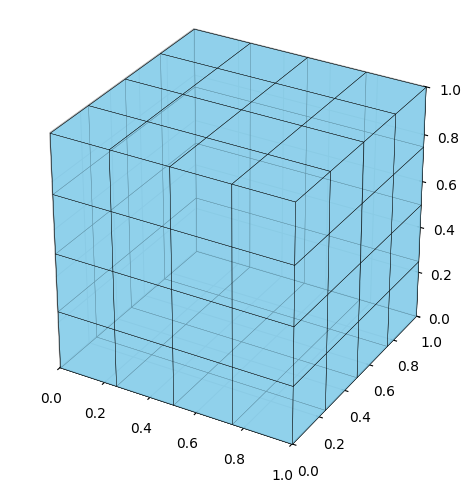

In [44]:
plot_subdivided_cube(divs=4)

In [45]:
data = oxygen['x']

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_cube_with_labels_and_dots(data, dots_x, dots_y):
    divs = data.shape[0]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_box_aspect([1, 1, 1])

    # --- Draw full cube ---
    def draw_face(axis, const):
        for i in range(divs):
            for j in range(divs):
                u = i / divs
                v = j / divs
                du = 1 / divs
                dv = 1 / divs

                if axis == 'z':
                    x = [u, u + du, u + du, u]
                    y = [v, v, v + dv, v + dv]
                    z = [const] * 4
                elif axis == 'y':
                    x = [u, u + du, u + du, u]
                    z = [v, v, v + dv, v + dv]
                    y = [const] * 4
                elif axis == 'x':
                    y = [u, u + du, u + du, u]
                    z = [v, v, v + dv, v + dv]
                    x = [const] * 4

                square = list(zip(x, y, z))
                ax.add_collection3d(Poly3DCollection(
                    [square], facecolors='lightgray', edgecolors='gray', linewidths=0.3, alpha=0.5
                ))

    draw_face('z', 0)
    draw_face('z', 1)
    draw_face('x', 0)
    draw_face('x', 1)
    draw_face('y', 0)
    draw_face('y', 1)

    # --- Draw labeled top grid (z = 1) ---
    for i in range(divs):
        for j in range(divs):
            x0 = j / divs
            y0 = i / divs
            x1 = (j + 1) / divs
            y1 = (i + 1) / divs
            z = 1

            square = [
                (x0, y0, z),
                (x1, y0, z),
                (x1, y1, z),
                (x0, y1, z)
            ]
            ax.add_collection3d(Poly3DCollection(
                [square], facecolors='white', edgecolors='black', linewidths=0.8
            ))

            # Label the bin in center
            label = str(data[i, j])
            ax.text((x0 + x1)/2, (y0 + y1)/2, z + 0.02, label,
                    ha='center', va='center', fontsize=10, color='black')

    # --- Plot data points (dots) on top face ---
    ax.scatter(dots_x, dots_y, zs=1.01, zdir='z', s=30, c='red', depthshade=False)

    ax.view_init(elev=30, azim=45)
    plt.title("Top Face with Grid, Labels, and Dots")
    plt.tight_layout()
    plt.show()

In [66]:
binned_array = np.array([data])

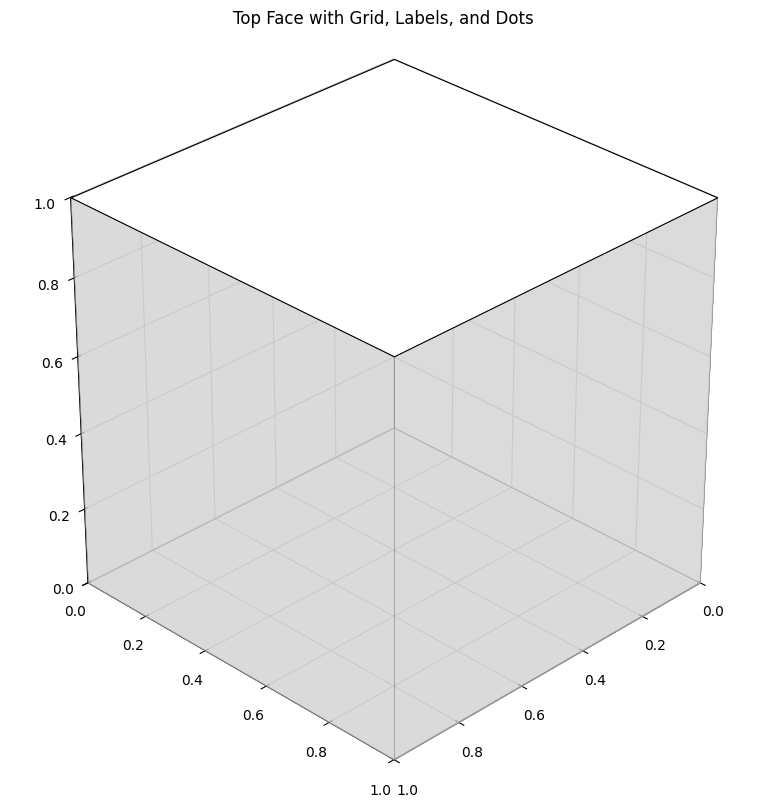

In [67]:
dots_x = np.array([0.15, 0.3, 0.65, 0.8, 0.5])
dots_y = np.array([0.9, 0.75, 0.6, 0.3, 0.2])

plot_cube_with_labels_and_dots(binned_array, dots_x, dots_y)

In [68]:
data = data[:(len(data) // 3) * 3]
coords_3d = data.reshape(-1, 3)

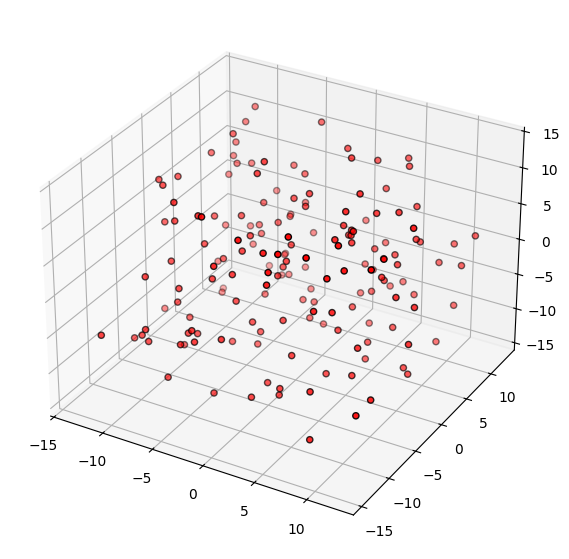

In [69]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coords_3d[:, 0], coords_3d[:, 1], coords_3d[:, 2], c='red', edgecolor='k')